In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from scipy.stats import norm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm

In [3]:
#Datos
#===============================================================================

datos=np.array([0.5,0.5,0.3,0.9,0.6,0.6,0.4,0.5,0.2,0.7,0.6,0.5,0.4,0.3,0.3,0.3,0.5,0.7,0.2,0.7])

[Text(0.5, 0, 'Campo magnético (T)'),
 Text(0.5, 1.0, 'Densidad de probabilidad e histograma datos campo magnético')]

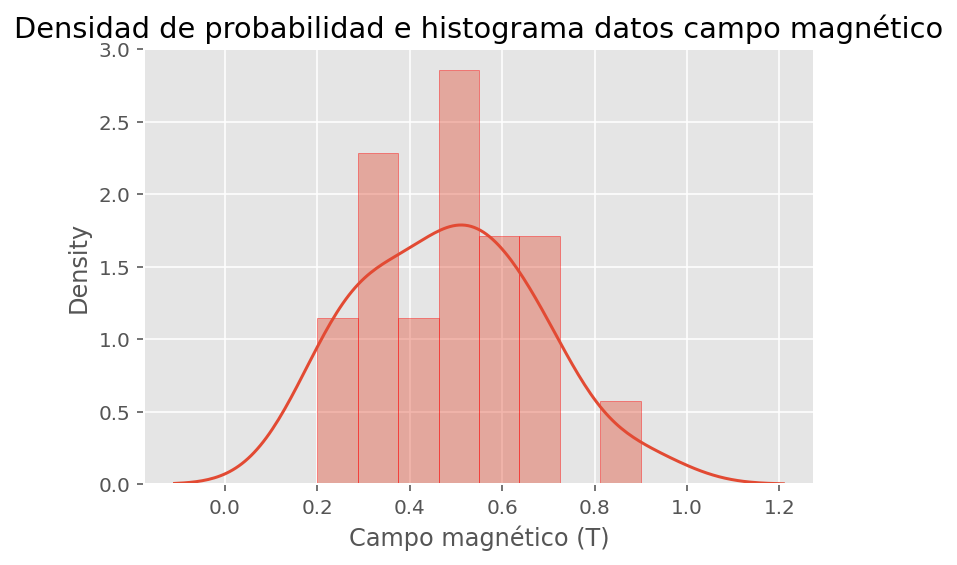

In [6]:
# Gráficos distribución observada
# ==============================================================================

ax = sns.distplot(datos, hist=True, kde=True, bins=8, hist_kws={'edgecolor':'red'})
ax.set(xlabel='Campo magnético (T)', title='Densidad de probabilidad e histograma datos campo magnético')

In [13]:
# Calculamos los parámetros de media, desviación y cuasidesviación
# ==============================================================================
media=np.mean(datos)
desviacion=np.std(datos)
cuasidesviacion=0
num=0
for i in range(0,len(datos)):
    num+=(datos[i]-media)**2
cuasidesviacion=np.sqrt(num/(len(datos)-1))
print("La media es "+str(media)+", la desviación es "+str(desviacion)+" y la cuasidesviacion es "+str(cuasidesviacion)+".")


La media es 0.4849999999999999, la desviación es 0.18241436346954698 y la cuasidesviacion es 0.18715318802914815.


In [30]:
# Calculamos el estadístico de contraste
# ==============================================================================

z=(media-0.5)/(cuasidesviacion/np.sqrt(len(datos)))
print("El estadístico de prueba tiene un valor Z= "+str(z))
#Calculamos el cuantil del valor P
# ==============================================================================
cuantil = np.quantile(a = datos, q = 0.36)
print(cuantil)


El estadístico de prueba tiene un valor Z= -0.3584338585487871
0.4


In [18]:
# Calculamos el P-value y el nivel de significancia
# ==============================================================================
p_value=1-norm.cdf(z)
alpha=0.05
print(p_value)
if (p_value<alpha/2):
    conclusion="La hipótesis es falsa, el montaje está averiado con una confianza del 95%"
else:
    conclusion="La hipótesis es verdadera, el montaje funciona con una confianza del 95%"
print(conclusion)

0.6399906714453681
La hipótesis es verdadera, el montaje funciona con una confianza del 95%


In [28]:
# Regiones de aceptacion y rechazo para significancia 0.05
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = datos, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[0.2   0.805]


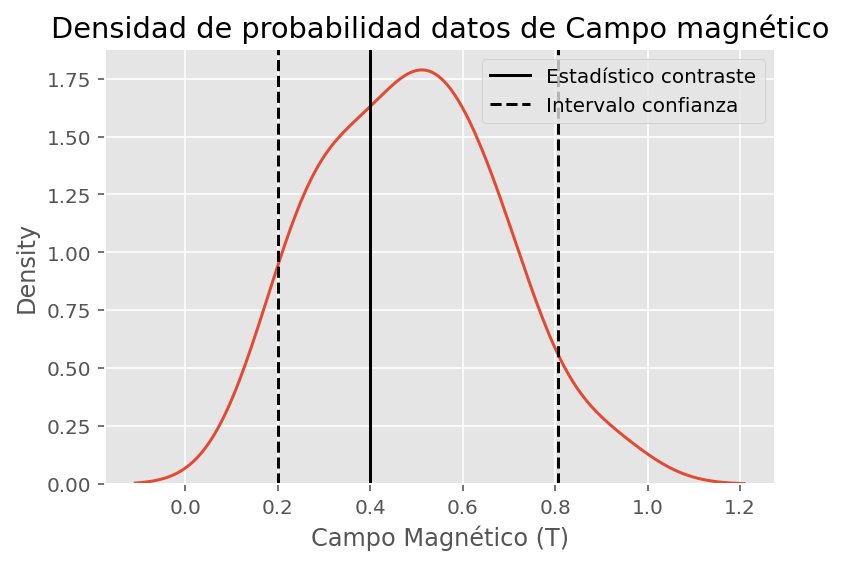

In [35]:
# Regiones de aceptacion y rechazo para significancia 0.05
# ==============================================================================
ax = sns.distplot(datos, hist=False, kde=True, bins=20, hist_kws={'edgecolor':'red'})
ax.set(xlabel='Campo Magnético (T)', title='Densidad de probabilidad datos de Campo magnético')
ax.axvline(x=cuantil, color='black', label='Estadístico contraste')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='Intervalo confianza')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.legend();